In [ ]:
#https://colab.research.google.com/

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
!git clone https://github.com/honda-s691470/SHS_NET_orient_for_IORsemi

In [ ]:
path = '/SHS_NET_orient_for_IORsemi/'
os.chdir(path)
!ls'
os.chdir(path)
!ls

In [2]:
import argparse
from collections import OrderedDict
import numpy as np
from tqdm import tqdm
import pandas as pd
import yaml
import torch
import torch.backends.cudnn as cudnn

In [ ]:
print(torch.cuda.is_available()) 

In [ ]:
!pip install timm

In [4]:
import archs
import losses
from dataset import make_loader
from utils import str2bool, label_maker, optim_maker, scheduler_maker, fig_maker
from train_val import train, val

In [5]:
ARCH_NAMES = archs.__all__
LOSS_NAMES = losses.__all__

In [6]:
def parse_args():
    parser = argparse.ArgumentParser()

    parser.add_argument('--name', default=None,
                        help='model name: (default: arch+timestamp)')
    parser.add_argument('--epochs', default=20, type=int, metavar='N',
                        help='number of total epochs to run')
    parser.add_argument('-b', '--batch_size', default=8, type=int,
                        metavar='N', help='mini-batch size (default: 16)')
    
    # model
    parser.add_argument('--arch', '-a', metavar='ARCH', default='Effnet',
                        choices=ARCH_NAMES,
                        help='model architecture: ' +
                        ' | '.join(ARCH_NAMES) +
                        ' (default: Effnet)')
    parser.add_argument('--input_channels', default=3, type=int,
                        help='input channels')
    parser.add_argument('--input_w', default=144, type=int,
                        help='image width')
    parser.add_argument('--input_h', default=144, type=int,
                        help='image height')
    
    # loss
    parser.add_argument('--loss', default='CEL',
                        choices=LOSS_NAMES,
                        help='loss: ' +
                        ' | '.join(LOSS_NAMES) +
                        ' (default: CEL)')

    # dataset
    parser.add_argument('--dataset', default='hand_all_rotation', 
                        help='dataset name')
    parser.add_argument('--label', default='image_list_hand_ver3.csv',
                        help='label name')
    parser.add_argument('--img_ext', default='.png',
                        help='image file extension')

    # optimizer
    parser.add_argument('--optimizer', default='Adabound',
                        choices=['Adam', 'SGD', 'Adabound'],
                        help='loss: ' +
                        ' | '.join(['Adam', 'SGD', 'Adabound']) +
                        ' (default: Adam)')
    parser.add_argument('--lr', '--learning_rate', default=1e-2, type=float,
                        metavar='LR', help='initial learning rate')
    parser.add_argument('--momentum', default=0.9, type=float,
                        help='momentum')
    parser.add_argument('--weight_decay', default=1e-4, type=float,
                        help='weight decay')
    parser.add_argument('--nesterov', default=False, type=str2bool,
                        help='nesterov')
    parser.add_argument('--test_ratio', default=0.25, type=float,
                        help='test_ratio')

    # scheduler
    parser.add_argument('--scheduler', default='CosineAnnealingLR',
                        choices=['CosineAnnealingLR', 'ReduceLROnPlateau', 'ConstantLR'])
    parser.add_argument('--min_lr', default=1e-4, type=float,
                        help='minimum learning rate')
    parser.add_argument('--factor', default=0.1, type=float)
    parser.add_argument('--patience', default=3, type=int)
    
    parser.add_argument('--num_workers', default=16, type=int)
    
    """
    If you have images stored on an external hard disk, you can set the path to use them in the training set.
    """    
    parser.add_argument('--img_path', default='', type=str)

    config = parser.parse_args(args=['--arch', 'Effnet', '--epochs', '10', '--test_ratio', '0.5', '--batch_size', '8'])
    return config


orientation_pred_log/models/hand_all_rotation_image_list_hand_ver3.csv_Effnet_batch64
--------------------
name: hand_all_rotation_image_list_hand_ver3.csv_Effnet_batch64
epochs: 10
batch_size: 64
arch: Effnet
input_channels: 3
input_w: 144
input_h: 144
loss: CEL
dataset: hand_all_rotation
label: image_list_hand_ver3.csv
img_ext: .jpg
mask_ext: .jpg
optimizer: Adabound
lr: 0.01
momentum: 0.9
weight_decay: 0.0001
nesterov: False
test_ratio: 0.25
scheduler: CosineAnnealingLR
min_lr: 0.0001
factor: 0.1
patience: 3
num_workers: 16
img_path: D:/SHS_AI
--------------------
number of label Counter({4: 1301, 6: 1301, 5: 1301, 7: 1301, 8: 1301, 10: 1301, 9: 1301, 11: 1301, 1: 682, 3: 682, 2: 682, 0: 682})
number of images in train  9852 , number of images in test  3284
=> creating model Effnet


  0%|          | 0/153 [00:00<?, ?it/s]

Epoch [0/10]


C:\Users\hs691\OneDrive\Phyton\Fall_in_RA_pt\orientation_phase\adabound.py:94: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:882.)
  exp_avg.mul_(beta1).add_(1 - beta1, grad)
  0%|          | 0/153 [00:00<?, ?it/s]

loss 0.2772 - val_loss 0.0166 - val_acc 0.9951 - Number of mistakes 16
=> saved best model
Epoch [1/10]


  0%|          | 0/153 [00:00<?, ?it/s]

loss 0.0181 - val_loss 0.0042 - val_acc 0.9982 - Number of mistakes 6
=> saved best model
Epoch [2/10]


  0%|          | 0/153 [00:00<?, ?it/s]

loss 0.0063 - val_loss 0.0004 - val_acc 1.0000 - Number of mistakes 0
=> saved best model
Epoch [3/10]


  0%|          | 0/153 [00:00<?, ?it/s]

loss 0.0037 - val_loss 0.0005 - val_acc 1.0000 - Number of mistakes 0
Epoch [4/10]


  0%|          | 0/153 [00:00<?, ?it/s]

loss 0.0025 - val_loss 0.0003 - val_acc 1.0000 - Number of mistakes 0
Epoch [5/10]


  0%|          | 0/153 [00:00<?, ?it/s]

loss 0.0034 - val_loss 0.0003 - val_acc 1.0000 - Number of mistakes 0
Epoch [6/10]


  0%|          | 0/153 [00:00<?, ?it/s]

loss 0.0042 - val_loss 0.0004 - val_acc 1.0000 - Number of mistakes 0
Epoch [7/10]


  0%|          | 0/153 [00:00<?, ?it/s]

loss 0.0023 - val_loss 0.0003 - val_acc 1.0000 - Number of mistakes 0
Epoch [8/10]


  0%|          | 0/153 [00:00<?, ?it/s]

loss 0.0045 - val_loss 0.0002 - val_acc 1.0000 - Number of mistakes 0
Epoch [9/10]


100%|██████████| 52/52 [00:15<00:00,  3.40it/s, val_loss=0.000381, val_acc=1]    

loss 0.0031 - val_loss 0.0004 - val_acc 1.0000 - Number of mistakes 0
best_val_acc 1.0000005960464478


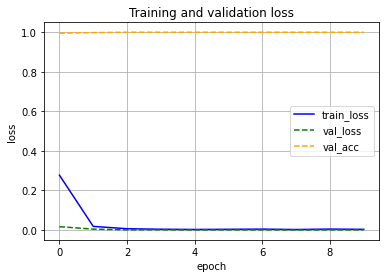

In [9]:
def main():
    config = vars(parse_args())

    if config['name'] is None:
        config['name'] = '%s_%s_%s_batch%s' % (config['dataset'], config['label'], config['arch'], config['batch_size'])
    print('orientation_pred_log/models/%s' % config['name'])
    os.makedirs('orientation_pred_log/models/%s' % config['name'], exist_ok=True)

    print('-' * 20)
    for key in config:
        print('%s: %s' % (key, config[key]))
    print('-' * 20)

    with open('orientation_pred_log/models/%s/config.yml' % config['name'], 'w') as f:
        yaml.dump(config, f)

    cudnn.benchmark = True
    img_ids_train, img_ids_test, img_labels_train, img_labels_test = label_maker(config)
    
    print("number of images in train ",len(img_ids_train), ", number of images in test ", len(img_ids_test)) 

    train_loader, val_loader = make_loader(img_ids_train, img_ids_test, img_labels_train, img_labels_test, config)
        
    #create model, optimizer, criterion 
    print("=> creating model %s" % config['arch'])
    model = archs.__dict__[config['arch']]()
    model = model.cuda() 
    params = filter(lambda p: p.requires_grad, model.parameters())
    criterion = losses.__dict__[config['loss']]().cuda()
    optimizer = optim_maker(params, config)
    log = OrderedDict([('epoch', []),('loss', []),('val_loss', []),('val_acc', [])])

    #create scheduler
    scheduler = scheduler_maker(optimizer, config)
    best_val_acc = 0
    for epoch in range(config['epochs']):
        print('Epoch [%d/%d]' % (epoch, config['epochs']))

        #model training
        train_log = train(train_loader, model, criterion, optimizer) 

        #model testing
        best_val_acc, df_log = val(val_loader, model, criterion, epoch, scheduler, config, train_log, log, best_val_acc)

    #visualization of learning process and improving accuracy
    print("best_val_acc", best_val_acc)
    fig_maker(df_log)

if __name__ == '__main__':
    main()

In [7]:
from dataset import make_loader_for_orientation
from train_val import pred_orient
from utils import cor_orient

In [10]:
def parse_args2():
    parser = argparse.ArgumentParser()

    parser.add_argument('--data_dir', default='input',
                        help='Directory containing the images to be aligned.')
    parser.add_argument('--output_dir', default='output',
                        help='Directory to put images with corrected orientation.')
    parser.add_argument('--img_path', default='D:/', type=str)
    parser.add_argument('--img_ext', default='.jpg',
                        help='image file extension')
    
    parser.add_argument('--output_w', default=630, type=int,
                        help='image width')
    parser.add_argument('--output_h', default=910, type=int,
                        help='image height')
    
    #parameter for trimming
    parser.add_argument('--trimming_one_hand', default=True,
                        help='Trimming the x-ray image of one hand after correcting the orientation.')
    parser.add_argument('--trim_ratio_one_hand_h', default=0.001, type=float,
                        help='Percentage of trimming the height of the x-ray image of one hand after correcting the orientation.')
    parser.add_argument('--trim_ratio_one_hand_w', default=0.001, type=float,
                        help='Percentage of trimming the width of the x-ray image of one hand after correcting the orientation.')

    parser.add_argument('--trimming_two_hand', default=True,
                        help='Trimming the x-ray image of one hand after correcting the orientation.')
    parser.add_argument('--trim_ratio_two_hand_h', default=0.001, type=float,
                        help='Percentage of trimming the height of the x-ray image of two hand after correcting the orientation.')
    parser.add_argument('--trim_ratio_two_hand_w', default=0.001, type=float,
                        help='Percentage of trimming the width of the x-ray image of two hand after correcting the orientation.')
    
    #parameter for resize

    parser.add_argument('--resize_one_hand', default=True,
                        help='Resize image of one_hand to the size of the output image.')
    parser.add_argument('--resize_two_hand', default=True,
                        help='Resize image of two_hand to the size of the output image.')
    
    config2 = parser.parse_args(args=['--data_dir', 'hand_test', '--img_path', '', '--output_dir','output', '--img_ext', '.png'])
    

    return config2

orientation_pred_log/models/hand_all_rotation_image_list_hand_ver3.csv_Effnet_batch64
===load_model===
ID_list ['test_img1', 'test_img2', 'test_img3', 'test_img4', 'test_img5', 'test_img6', 'test_img7', 'test_img8']
====  test_img1_L ====


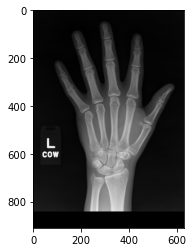

====  test_img2_L ====


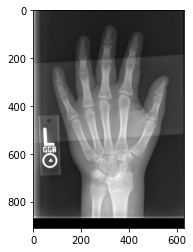

====  test_img3_L ====


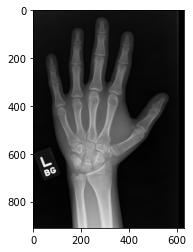

====  test_img4_L ====


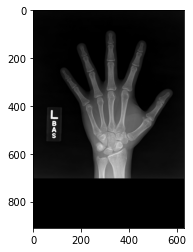

====  test_img5_L ====


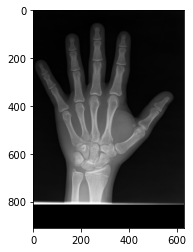

====  test_img5_R ====


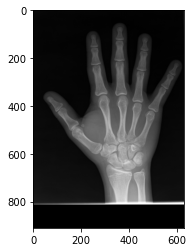

====  test_img6_L ====


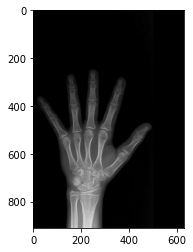

====  test_img6_R ====


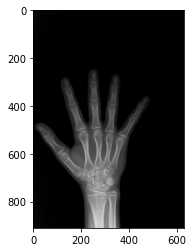

====  test_img7_L ====


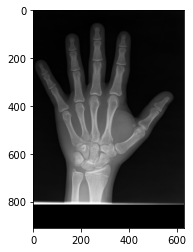

====  test_img7_R ====


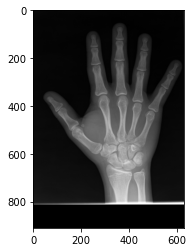

====  test_img8_L ====


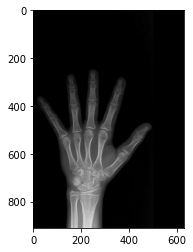

====  test_img8_R ====


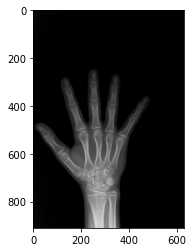

In [11]:
def main():
    config = vars(parse_args())
    config2 = vars(parse_args2())

    if config['name'] is None:
        config['name'] = '%s_%s_%s_batch%s' % (config['dataset'], config['label'], config['arch'], config['batch_size'])
    print('orientation_pred_log/models/%s' % config['name'])

    cudnn.benchmark = True

    img_list=[]
    for curDir, dirs, files in os.walk(config2['data_dir']):
        for i, file in enumerate(files):
            if file.endswith(config2['img_ext']):
                file = file[:-4]
                img_list.append(os.path.join(file))
    test_loader = make_loader_for_orientation(img_list, config, config2)
        
    #model loading
    model = archs.__dict__[config['arch']]()
    model = model.cuda() 
    params = filter(lambda p: p.requires_grad, model.parameters())

    # prediction
    pred_dataframe = pred_orient(test_loader, model, config, config2)

    cor_orient(pred_dataframe, config2)

if __name__ == '__main__':
    main()